In [1]:
import pandas as pd
import time
import datetime
import numpy as np
import matplotlib.pyplot as plt
import SSA as ss
from datetime import datetime

# Deploying API

In [4]:
pd.set_option('display.notebook_repr_html', True)
ticker = 'AAPL'
period1 = int(time.mktime(datetime(2015,10,28,20,1).timetuple()))
period2 = int(time.mktime(datetime(2021,11,28,20,1).timetuple()))
interval = '1d' #1w 1m 1y
url_string = f'https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={period1}&period2={period2}&interval={interval}&events=history&includeAdjustedClose=true'

print(url_string)
data = pd.read_csv(url_string,sep=r',')
data

https://query1.finance.yahoo.com/v7/finance/download/AAPL?period1=1446084060&period2=1638151260&interval=1d&events=history&includeAdjustedClose=true


,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-10-29,29.674999,30.172501,29.567499,30.132500,27.627586,204909200
1,2015-10-30,30.247499,30.305000,29.862499,29.875000,27.391495,197461200
2,2015-11-02,30.200001,30.340000,29.902500,30.295000,27.776581,128813200
3,2015-11-03,30.197500,30.872499,30.174999,30.642500,28.095198,182076000
4,2015-11-04,30.782499,30.955000,30.405001,30.500000,27.964544,179544400
...,...,...,...,...,...,...,...
1526,2021-11-19,157.649994,161.020004,156.529999,160.550003,160.550003,117305600
1527,2021-11-22,161.679993,165.699997,161.000000,161.020004,161.020004,117467900
1528,2021-11-23,161.119995,161.800003,159.059998,161.410004,161.410004,96041900
1529,2021-11-24,160.750000,162.139999,159.639999,161.940002,161.940002,69463600


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1531 entries, 0 to 1530
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1531 non-null   object 
 1   Open       1531 non-null   float64
 2   High       1531 non-null   float64
 3   Low        1531 non-null   float64
 4   Close      1531 non-null   float64
 5   Adj Close  1531 non-null   float64
 6   Volume     1531 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 83.9+ KB


# Dataset filtering

Let's look up for the scree diagram of the Yahoo finance dataset

# Index Selection

![table1](index.png)

In [49]:
x1 = data['Close'].to_numpy()
x2 = data['Open'].to_numpy()
x3 = data['High'].to_numpy()
x4 = data['Low'].to_numpy()
x5 = data['Volume'].to_numpy()

In [84]:
#5-day average trading volume ATV(5)
x6 = np.zeros(len(x5)-4)
for i in range(len(x5)-4):
    prom = sum(x5[i:i+5])/5
    x6[i] = prom

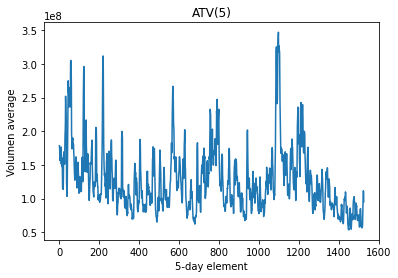

In [92]:
plt.plot(x6)
plt.title('ATV(5)')
plt.xlabel('5-day element')
plt.ylabel('Volumen average')
plt.show()

In [81]:
#20-day average trading volume ATV(20)
x7 = np.zeros(len(x5)-19)
for i in range(len(x5)-19):
    prom = sum(x5[i:i+20])/20
    x7[i] = prom

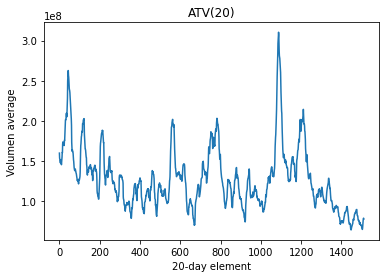

In [99]:
plt.plot(x7)
# plt.plot(x5)
plt.title('ATV(20)')
plt.xlabel('20-day element')
plt.ylabel('Volumen average')
plt.show()

In [85]:
#5-day moving average MA(5)
x8 = np.zeros(len(x2)-4)
for i in range(len(x2)-4):
    prom = sum(x2[i:i+5])/5
    x8[i] = prom

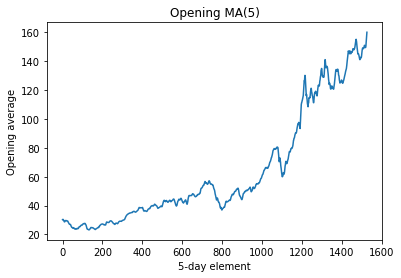

In [102]:
plt.plot(x8)
# plt.plot(x1)
plt.title('Opening MA(5)')
plt.xlabel('5-day element')
plt.ylabel('Opening average')
plt.show()

In [100]:
#20-day moving average MA(20)
x9 = np.zeros(len(x2)-19)
for i in range(len(x2)-19):
    prom = sum(x2[i:i+20])/20
    x9[i] = prom

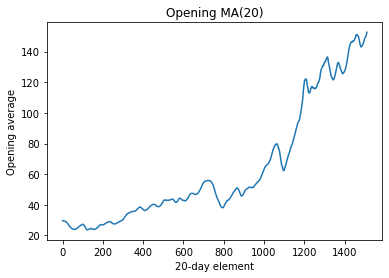

In [103]:
plt.plot(x9)
# plt.plot(x1)
plt.title('Opening MA(20)')
plt.xlabel('20-day element')
plt.ylabel('Opening average')
plt.show()

In [147]:
#12-day exponential moving average EXMA(12)
x10 = np.zeros(len(x2))
s = 2/(12+1)
x10[0] = sum(x1[:12])/12
for i in range(len(x2)-1):
    EMAi = x1[i+1]*s + x10[i]*(1-s)  
    x10[i+1] = EMAi

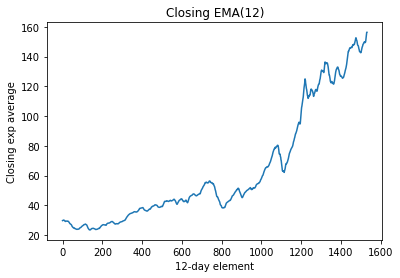

In [148]:
plt.plot(x10)
plt.title('Closing EMA(12)')
plt.xlabel('12-day element')
plt.ylabel('Closing exp average')
plt.show()

$$EMA_t = [V_t (\frac{s}{1+d})]+EMA_y[1-(\frac{s}{1+d})]$$

$s:=$ 2/selected time period+1

$V_t:=$ value today

$d:=$ number of days

$EMA_y:=$ EMA yesterday

In [149]:
#26-day exponential moving average EXMA(26)
x11aux = np.zeros(len(x1))
s = 2/(26+1)
x11aux[0] = sum(x1[0:26])/26
for i in range(len(x2)-1):
    EMAi = x1[i+1]*s + x11aux[i]*(1-s)  
    x11aux[i+1] = EMAi
#MACD
x11= x10-x11aux

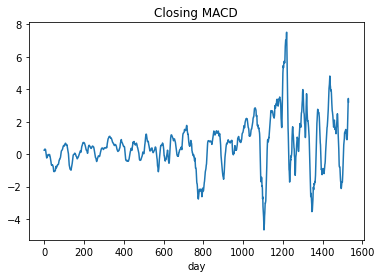

In [153]:
plt.plot(x11)
plt.title('Closing MACD')
plt.xlabel('day')
plt.show()

### MACD = 12-Period EMA - 26-Period EMA

In [156]:
gain = -data['Open']+data['Close']

In [158]:
gain.to_numpy()

array([ 0.457501, -0.372499,  0.094999, ...,  0.290009,  1.190002,
       -2.760009])

In [162]:
tgain = np.zeros(len(gain))
tloss = np.zeros(len(gain))
for i in range(len(gain)):
    if gain[i] >=0:
        tgain[i] = gain[i]
    else:
        tloss[i] = abs(gain[i])
    

In [163]:
tgain

array([0.457501, 0.      , 0.094999, ..., 0.290009, 1.190002, 0.      ])

In [164]:
tloss

array([0.      , 0.372499, 0.      , ..., 0.      , 0.      , 2.760009])

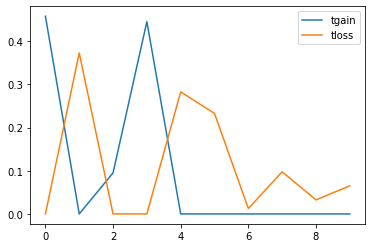

In [168]:
plt.plot(tgain[:10],label='tgain')
plt.plot(tloss[:10],label='tloss')
plt.legend()
plt.show()

In [181]:
favg_gain = np.zeros(len(tgain)-8)
for i in range(len(tgain)-8):
    prom = sum(tgain[i:i+9])/9
    favg_gain[i] = prom
favg_loss = np.zeros(len(tloss)-8)
for i in range(len(tloss)-8):
    prom = sum(tloss[i:i+9])/9
    favg_loss[i] = prom

avg_gain = np.zeros(len(tgain))
avg_loss = np.zeros(len(tgain))
avg_gain[0] = favg_gain[0]
avg_loss[0] = favg_loss[0]
x12 = np.zeros(len(tgain))
for i in range(len(tgain)-1):
    avgai = ( tgain[i+1] + avg_gain[i]*(8)  )/9
    avloss = ( tloss[i+1] + avg_loss[i]*(8)  )/9
    avg_gain[i+1] = avgai
    avg_loss[i+1] = avloss
    RS = avgai/avloss
    RSIi = 100-100/(1+RS)
    x12[i+1] = RSIi

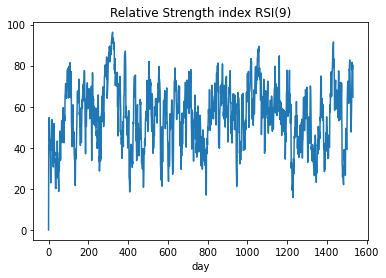

In [182]:
plt.plot(x12)
plt.title('Relative Strength index RSI(9)')
plt.xlabel('day')
plt.show()

In [183]:
def ADX(data, period):
    """
    Computes the ADX indicator.
    """
    
    df = data.copy()
    alpha = 1/period

    # TR
    df['H-L'] = df['High'] - df['Low']
    df['H-C'] = np.abs(df['High'] - df['Close'].shift(1))
    df['L-C'] = np.abs(df['Low'] - df['Close'].shift(1))
    df['TR'] = df[['H-L', 'H-C', 'L-C']].max(axis=1)
    del df['H-L'], df['H-C'], df['L-C']

    # ATR
    df['ATR'] = df['TR'].ewm(alpha=alpha, adjust=False).mean()

    # +-DX
    df['H-pH'] = df['High'] - df['High'].shift(1)
    df['pL-L'] = df['Low'].shift(1) - df['Low']
    df['+DX'] = np.where(
        (df['H-pH'] > df['pL-L']) & (df['H-pH']>0),
        df['H-pH'],
        0.0
    )
    df['-DX'] = np.where(
        (df['H-pH'] < df['pL-L']) & (df['pL-L']>0),
        df['pL-L'],
        0.0
    )
    del df['H-pH'], df['pL-L']

    # +- DMI
    df['S+DM'] = df['+DX'].ewm(alpha=alpha, adjust=False).mean()
    df['S-DM'] = df['-DX'].ewm(alpha=alpha, adjust=False).mean()
    df['+DMI'] = (df['S+DM']/df['ATR'])*100
    df['-DMI'] = (df['S-DM']/df['ATR'])*100
    del df['S+DM'], df['S-DM']

    # ADX
    df['DX'] = (np.abs(df['+DMI'] - df['-DMI'])/(df['+DMI'] + df['-DMI']))*100
    df['ADX'] = df['DX'].ewm(alpha=alpha, adjust=False).mean()
    del df['DX'], df['ATR'], df['TR'], df['-DX'], df['+DX'], df['+DMI'], df['-DMI']

    return df

In [188]:
Adx = ADX(data,14)
x13 = Adx['ADX'].to_numpy()

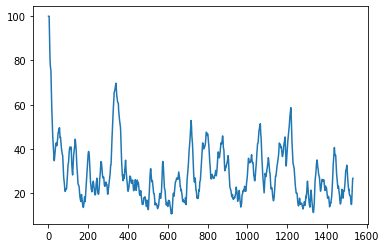

In [190]:
plt.plot(x13)

# DataBase

In [255]:
Base1 = pd.DataFrame()

In [258]:
for i in range(13):
    name = 'x'+f'{i+1}'
    index = globals()[name] 
    Base1[name] = index[0:1512]

In [259]:
Base1

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13
0,30.132500,29.674999,30.172501,29.567499,178560800,178560800.0,159801300.0,30.220500,29.597125,29.776458,0.246362,0.000000,NaN
1,29.875000,30.247499,30.305000,29.862499,178560800,174490800.0,153482540.0,30.378000,29.592000,29.791618,0.235974,40.771509,100.000000
2,30.295000,30.200001,30.340000,29.902500,178560800,165212480.0,152390560.0,30.384000,29.554500,29.869062,0.258650,43.545875,100.000000
3,30.642500,30.197500,30.872499,30.174999,178560800,156597440.0,150433000.0,30.392000,29.528875,29.988052,0.301190,54.722463,100.000000
4,30.500000,30.782499,30.955000,30.405001,178560800,168187600.0,148182280.0,30.197500,29.485750,30.066813,0.319718,47.943644,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,148.639999,148.679993,149.369995,147.619995,50720600,78527440.0,73035800.0,148.882001,150.380501,146.625127,0.721314,65.721451,22.988740
1508,149.320007,149.330002,150.839996,149.009995,60893400,83300980.0,76373165.0,148.944003,151.030501,147.039724,0.882859,65.647998,22.311998
1509,148.850006,149.360001,149.729996,148.490005,56094900,84946700.0,78130590.0,148.810004,151.620000,147.318229,0.961872,61.690217,21.418292
1510,152.570007,149.820007,153.169998,149.720001,100077900,84630020.0,78799025.0,149.016003,152.189500,148.126195,1.309568,71.949037,21.806410


In [260]:
for i in range(13):
    name = 'x'+f'{i+1}'
    index = globals()[name]
    print(index.shape)

(1531,)
(1531,)
(1531,)
(1531,)
(1531,)
(1527,)
(1512,)
(1527,)
(1512,)
(1531,)
(1531,)
(1531,)
(1531,)
